In [3]:
%config Completer.use_jedi = False

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
model = MobileNet(include_top=False, #  분류기(Dense)를 빼고 Conv레이어만 사용하겠다.
                 weights="imagenet")

Metal device set to: Apple M1


2022-12-13 14:29:15.699230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 14:29:15.699675: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


17225924/17225924 [==============================] - 1s 0us/step


In [9]:
model.trainable = False
model = Sequential([model,
                    GlobalAveragePooling2D(),
                    Dense(4, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 4100      
                                                                 
Total params: 3,232,964
Trainable params: 4,100
Non-trainable params: 3,228,864
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', # 변경 다중
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
import os

# 기본 경로
base_dir = '/Users/hye/Desktop/HS/mok/2022/2학기/2.인공지능응용시스템/프로젝트/test2'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

In [12]:
BATCH_SIZE = 32
image_height = 160
image_width = 160

In [13]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")


Found 1277 images belonging to 4 classes.


In [14]:
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width), 
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

Found 452 images belonging to 4 classes.


In [15]:
history=model.fit(train_generator,
          epochs=30,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/30


2022-12-13 14:29:34.070480: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-13 14:29:34.753850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-13 14:29:45.053555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 - 14s - loss: 0.5910 - accuracy: 0.7768 - val_loss: 0.3376 - val_accuracy: 0.8894 - 14s/epoch - 355ms/step
Epoch 2/30
40/40 - 13s - loss: 0.2536 - accuracy: 0.9162 - val_loss: 0.2492 - val_accuracy: 0.9314 - 13s/epoch - 318ms/step
Epoch 3/30
40/40 - 13s - loss: 0.1917 - accuracy: 0.9366 - val_loss: 0.1955 - val_accuracy: 0.9403 - 13s/epoch - 318ms/step
Epoch 4/30
40/40 - 13s - loss: 0.1564 - accuracy: 0.9475 - val_loss: 0.1741 - val_accuracy: 0.9491 - 13s/epoch - 314ms/step
Epoch 5/30
40/40 - 13s - loss: 0.1303 - accuracy: 0.9608 - val_loss: 0.1514 - val_accuracy: 0.9580 - 13s/epoch - 316ms/step
Epoch 6/30
40/40 - 13s - loss: 0.1189 - accuracy: 0.9593 - val_loss: 0.1386 - val_accuracy: 0.9624 - 13s/epoch - 321ms/step
Epoch 7/30
40/40 - 13s - loss: 0.0949 - accuracy: 0.9702 - val_loss: 0.1287 - val_accuracy: 0.9690 - 13s/epoch - 321ms/step
Epoch 8/30
40/40 - 13s - loss: 0.0878 - accuracy: 0.9734 - val_loss: 0.1181 - val_accuracy: 0.9712 - 13s/epoch - 329ms/step
Epoch 9/30
40/40 - 

Text(0.5, 1.0, 'loss')

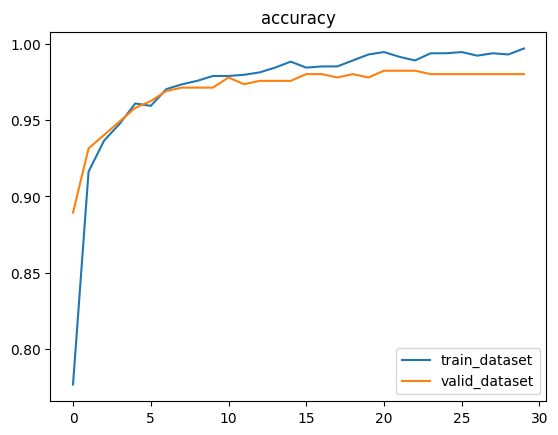

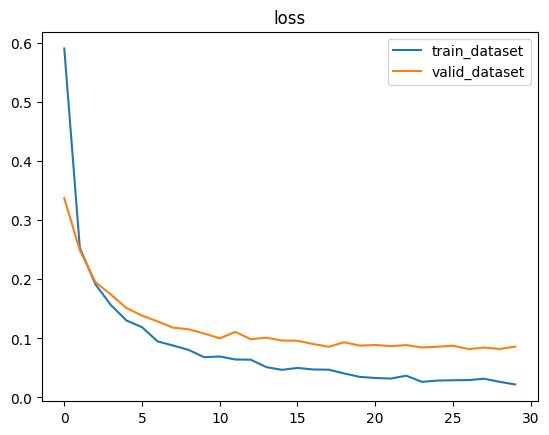

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="train_dataset")
plt.plot(epochs, val_accuracy, label="valid_dataset")
plt.legend()
plt.title('accuracy')
plt.figure()


plt.plot(epochs, loss, label="train_dataset")
plt.plot(epochs, val_loss, label="valid_dataset")
plt.legend()
plt.title('loss')


1/1 [==============================] - 0s 351ms/step


2022-12-13 14:42:07.467223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


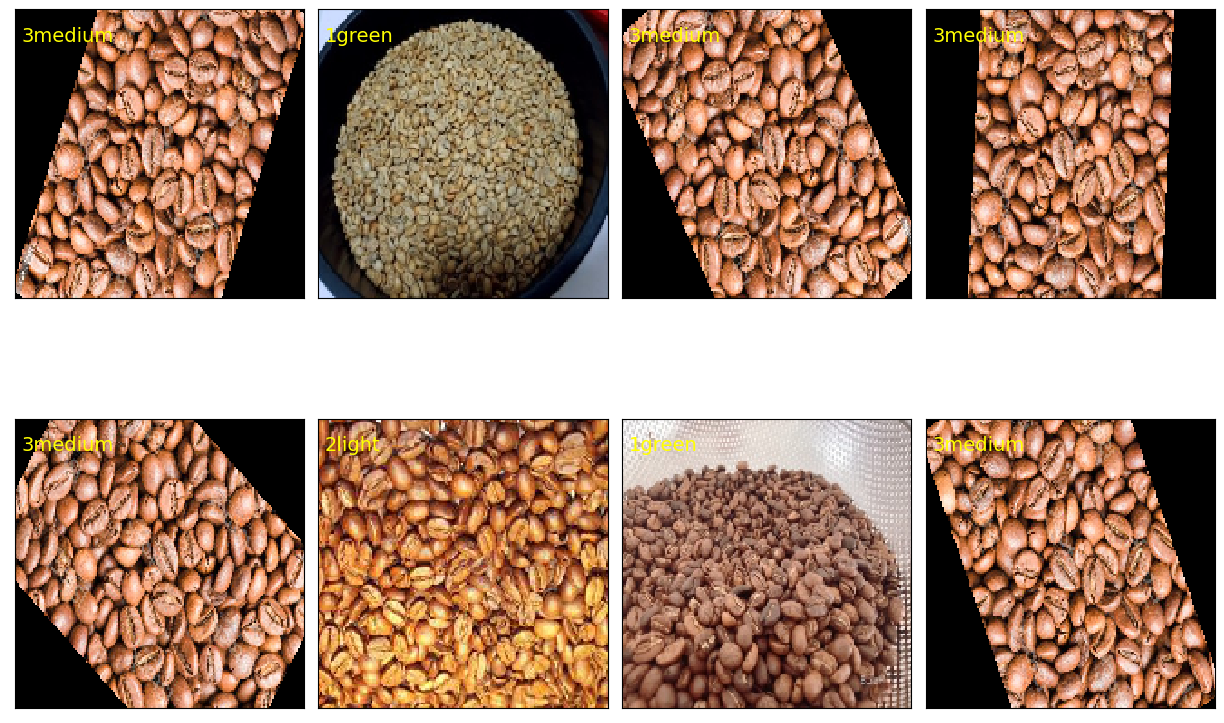

In [17]:
class_names = ['1green', '2light', '3medium', '4dark']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)


In [18]:
# 7. 모델 저장하기
from tensorflow.python.keras.models import load_model
model.save('model_mobilenet.h5')

In [20]:
loss, acc = model.evaluate_generator(train_generator,  verbose=1)
print('loss: ', loss, 'accuracy: ', acc) # loss:  0.4534463981787364 accuracy:  0.8333333

/var/folders/kr/13b5rffx469g87nlgp_r232m0000gn/T/ipykernel_2731/3443249433.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(train_generator,  verbose=1)


40/40 [==============================] - 10s 236ms/step - loss: 0.0263 - accuracy: 0.9922
loss:  0.02630472369492054 accuracy:  0.9921691417694092
